In [1]:
import json
import sys
import os
import pprint
import time
from datetime import datetime
import pandas as pd
import re
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# rs_basepath = ""
news_path = "politics/RS_politics"

submissions = pd.DataFrame()
submissions = pd.read_json(news_path, lines=True)

# submissions.head()


In [3]:
rc_news_path = "politics/RC_politics_sample"

comments = pd.DataFrame()
comments = pd.read_json(rc_news_path, lines=True)
# comments.head()


In [4]:
news_urls_right = {"The_American_spectator":"spectator", "Breitbart":"breitbart",
                   "CBN":"cbn", "The_Daily_Caller": "dailycaller", "The_Daily_Mail": "dailymail",
                   "The_Daily_Wire" : "dailywire", "The_Fox_News": "foxnews", "The_Federalist": "thefederalist",
                   "National_Review":"nationalreview", "New_York_Post" : "nypost", "Newsmax": "newsmax",
                   "Reason": "reason", "Washington_Examiner":"washingtonexaminer",
                   "The_Washington_Times":"washingtontimes"
                   }
# "The_Wall_Street_Journal_Opinion_Base": "wsj/news/opinion",
# "The_Wall_Street_Journal_Opinion_Archive": "wsj/articles",

news_urls_center = {"Associated_Press":"apnews", "BBC":"bbc", "Bloomberg":"bloomberg",
                    "The_Christian_Science_Monitor":"csmonitor", "NPR_Online": "npr",
                    "Reuters" :"reuters", "The_Hill":"thehill", "USA_Today": "usatoday",
                    "Wall_Street_Journal_News": "wsj"}

news_urls_left = {"ABC_News": "abcnews", "The_Atlantic":"theatlantic", "The_Buzzfeed_News": "buzzfeednews",
                  "CBS_News": "cbsnews", "CNN_Online":"cnn", "The_Economist": "economist",
                  "The_Gaurdian": "theguardian", "NBC_News":"nbcnews", "The_New_York_Times":"nytimes",
                  "The_Los_Angeles_Times":"latimes", 
                  "Politico": "politico", "The_Washington_Post": "washingtonpost",
                  "Alternet": "alternet", "Democracy_Now": "democracynow", 
                  "The_Daily_Beast":"thedailybeast", "The_Huffington_Post":"huffpost",
                  "The Intercept":"theintercept", "Jacobin":"jacobinmag", "Mother Jones":"motherjones",
                  "MSNBC":"msnbc", "The_New_Yorker":"newyorker", "The_Nation":"thenation",
                  "Slate":"slate", "Vox":"vox"}
news_urls_social_media = ["youtube", "google", "twitter","yahoo", "youtu.be", "instagram", "reddit", "facebook", "spotify"]

all_urls = list(news_urls_right.values()) + list(news_urls_left.values()) + list(news_urls_center.values()) + news_urls_social_media

In [5]:
def get_leaning(domain_name):
    for s in news_urls_right.values():
        if domain_name.startswith(s) or "."+s in domain_name:
            return "right"
    for s in news_urls_left.values():
        if domain_name.startswith(s) or "."+s in domain_name:
            return "left"
    for s in news_urls_center.values():
        if domain_name.startswith(s) or "."+s in domain_name:
            return "center"
    for s in news_urls_social_media:
        if domain_name.startswith(s) or "."+s in domain_name:
            return "social"
    return "other" 

In [6]:
def get_base_domain(domain_name):
    # print(domain_name)
    for s in all_urls:
        if domain_name.startswith(s) or "."+s in domain_name:
            # print("Matched: ", s)
            return s
    return domain_name

In [7]:
submissions["leaning"] = submissions["domain"].apply(lambda x: get_leaning(x))
submissions["base_domain"] = submissions["domain"].apply(lambda x: get_base_domain(x))
submissions["full_date"] =  submissions["created_utc"].apply(lambda x: datetime.fromtimestamp(x))
submissions["date"] = submissions["full_date"].dt.date

# submissions.head()

posts_right = submissions.loc[submissions["leaning"] == "right"]
posts_left = submissions.loc[submissions["leaning"] == "left"]
posts_center = submissions.loc[submissions["leaning"] == "center"]
posts_social =  submissions.loc[submissions["leaning"] == "social"]
posts_other = submissions.loc[submissions["leaning"] == "other"]

all_included_posts = submissions.loc[submissions["leaning"] != "other"]

Posts with right leaning news outlet url:  6947
Posts with left leaning news outlet url:  32582
Posts with center leaning news outlet url:  10720
Posts from social media: 15783
Posts with other news outlet url:  60141
Total postas included in analysis:  66032
Total:  126173


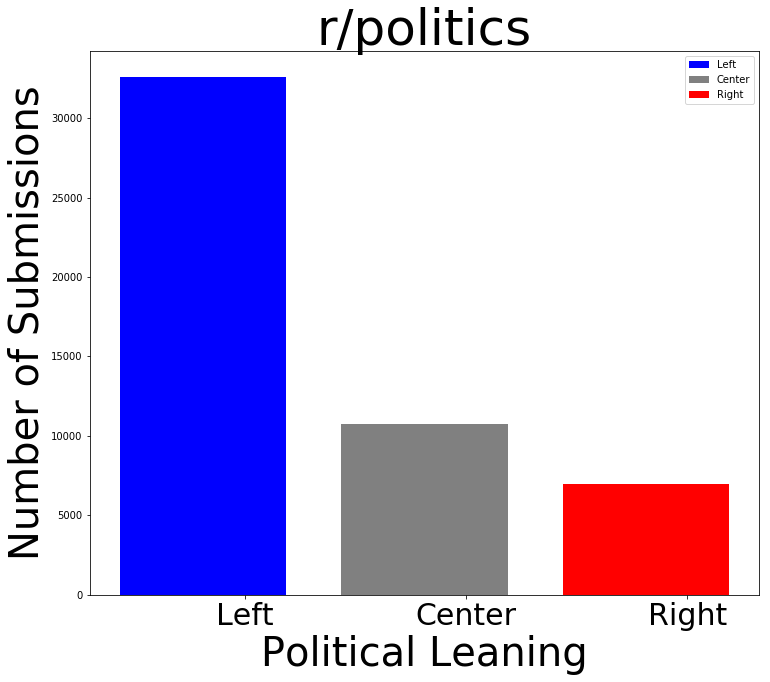

In [8]:
print("Posts with right leaning news outlet url: ", len(posts_right))
print("Posts with left leaning news outlet url: ", len(posts_left))
print("Posts with center leaning news outlet url: ", len(posts_center))
print("Posts from social media:", len(posts_social))
print("Posts with other news outlet url: ", len(posts_other))
print("Total postas included in analysis: ", len(all_included_posts))
print("Total: ", len(submissions))


plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [len(posts_left), len(posts_center), len(posts_right)]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Submissions', fontsize=40)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/politics',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  

ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('politics/p1.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

# all_included_posts.plot.bar(x="leaning", y="counts")
# plt.xticks(np.arange(len(all_included_posts.counts)), all_included_posts.leaning)
# plt.xlabel("Leanings")
# plt.ylabel("Number of Posts")
# plt.title("Bar Plot for Number of Posts v/s Leaning of media outlet")
# plt.show()

In [9]:
domain_post_frequency =  all_included_posts.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 overall domains: \n\n")
domain_post_frequency.head(20)

Top 20 overall domains: 




,base_domain,count
54,youtube,9761
49,washingtonpost,6648
30,nytimes,5413
8,cnn,4652
31,politico,3603
42,thehill,3564
41,theguardian,2053
34,reuters,1816
53,youtu.be,1568
16,foxnews,1377


In [10]:
right_domain_post_frequency =  posts_right.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 right leaning domains: \n\n")
right_domain_post_frequency.head(20)

Top 20 right leaning domains: 




,base_domain,count
5,foxnews,1377
0,breitbart,1006
3,dailymail,807
2,dailycaller,696
13,washingtontimes,694
8,nypost,667
12,washingtonexaminer,477
6,nationalreview,296
4,dailywire,282
9,reason,266


In [11]:
left_domain_post_frequency =  posts_left.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 left leaning domains: \n\n")
left_domain_post_frequency.head(20)

Top 20 left leaning domains: 




,base_domain,count
22,washingtonpost,6648
13,nytimes,5413
3,cnn,4652
14,politico,3603
18,theguardian,2053
11,nbcnews,1163
21,vox,1142
17,thedailybeast,1088
0,abcnews,974
15,slate,814


In [12]:
center_domain_post_frequency =  posts_center.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 center leaning domains: \n\n")
center_domain_post_frequency.head(20)

Top 20 center leaning domains: 




,base_domain,count
6,thehill,3564
5,reuters,1816
7,usatoday,1228
1,bbc,1100
2,bloomberg,996
4,npr,858
8,wsj,786
0,apnews,253
3,csmonitor,119


In [13]:
social_domain_post_frequency =  posts_social.groupby("base_domain").count()["id"].reset_index(name='count').sort_values(['count'], ascending=False) 
print("Top 20 social media domains: \n\n")
social_domain_post_frequency.head(20)

Top 20 social media domains: 




,base_domain,count
8,youtube,9761
7,youtu.be,1568
5,twitter,1188
6,yahoo,1166
3,reddit,902
1,google,897
0,facebook,279
2,instagram,20
4,spotify,2


In [14]:
overall_average_score =  all_included_posts.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 overall average scores by domain:\n\n")
overall_average_score.head(20)

Top 20 overall average scores by domain:




,base_domain,average_score
44,thenation,520.475806
42,thehill,466.501964
47,vox,426.629597
35,slate,421.379607
23,msnbc,368.221925
22,motherjones,340.099602
39,thedailybeast,339.278493
31,politico,311.114904
25,nbcnews,307.036113
49,washingtonpost,288.074007


In [15]:
right_average_score =  posts_right.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for right leaning outlets:\n\n")
right_average_score.head(20)

Top 20 average scores by domain for right leaning outlets:




,base_domain,average_score
8,nypost,90.862069
7,newsmax,88.259669
13,washingtontimes,80.677233
12,washingtonexaminer,75.180294
3,dailymail,67.997522
9,reason,60.796992
6,nationalreview,52.908784
4,dailywire,50.106383
5,foxnews,48.524328
2,dailycaller,11.900862


In [16]:
left_average_score =  posts_left.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for left leaning outlets:\n\n")
left_average_score.head(20)

Top 20 average scores by domain for left leaning outlets:




,base_domain,average_score
20,thenation,520.475806
21,vox,426.629597
15,slate,421.379607
10,msnbc,368.221925
9,motherjones,340.099602
17,thedailybeast,339.278493
14,politico,311.114904
11,nbcnews,307.036113
22,washingtonpost,288.074007
8,latimes,287.059925


In [17]:
center_average_score =  posts_center.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for center leaning outlets:\n\n")
center_average_score.head(20)

Top 20 average scores by domain for center leaning outlets:




,base_domain,average_score
6,thehill,466.501964
0,apnews,236.727273
7,usatoday,213.710098
3,csmonitor,145.529412
4,npr,138.883450
2,bloomberg,125.669679
5,reuters,113.159141
1,bbc,57.240909
8,wsj,6.743003


In [18]:
social_average_score =  posts_social.groupby("base_domain")['score'].mean().reset_index(name="average_score").sort_values(['average_score'], ascending=False) 
print("Top 20 average scores by domain for social media:\n\n")
social_average_score.head(20)

Top 20 average scores by domain for social media:




,base_domain,average_score
6,yahoo,139.007719
8,youtube,7.020285
3,reddit,4.341463
1,google,3.692308
5,twitter,1.061448
4,spotify,1.000000
7,youtu.be,0.998087
0,facebook,0.989247
2,instagram,0.950000


In [19]:
average_right_posts_score = posts_right["score"].mean()
average_left_posts_score = posts_left["score"].mean()
average_center_posts_score = posts_center["score"].mean()
average_social_posts_score = posts_social["score"].mean()

No handles with labels found to put in legend.


Average score of comments for submissions

----------------------------------------------------


Average score of posts from right leaning outlets:  50.048510148265436
Average score of posts from left leaning outlets:  233.97851574488982
Average score of posts from center leaning outlets:  235.107276119403
Average score of posts from social media:  15.266996135082051


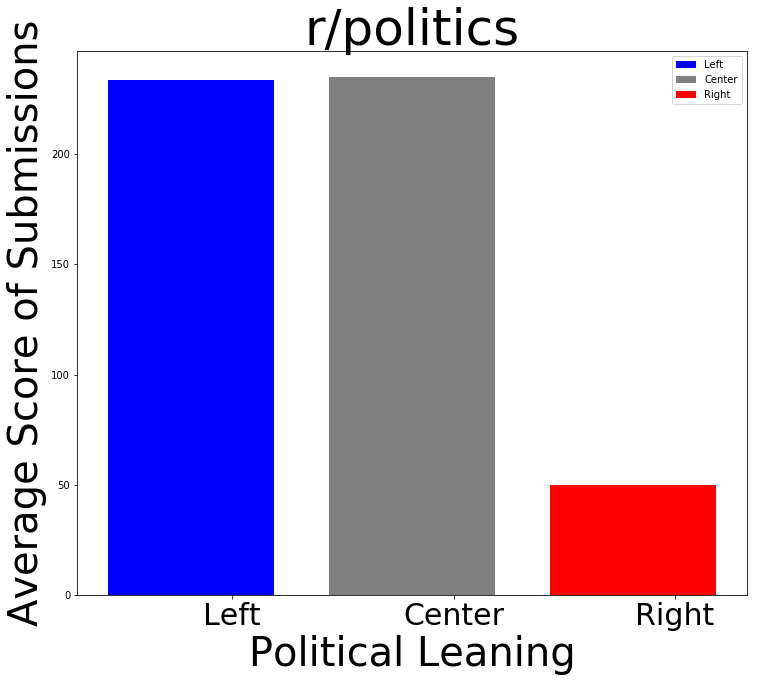

In [85]:
print("Average score of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average score of posts from right leaning outlets: ", average_right_posts_score)
print("Average score of posts from left leaning outlets: ", average_left_posts_score)
print("Average score of posts from center leaning outlets: ", average_center_posts_score)
print("Average score of posts from social media: ", average_social_posts_score)


plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [average_left_posts_score, average_center_posts_score, average_right_posts_score]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Score of Submissions', fontsize=40)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/politics',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
ax.legend()

ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('politics/p2.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [21]:
comments["p_link_id"] = comments["link_id"].apply(lambda x: x.split("_")[1])

In [22]:
comments_right = comments.loc[comments['p_link_id'].isin(posts_right["id"])]
comments_right["leaning"] = "right"

comments_left = comments.loc[comments['p_link_id'].isin(posts_left["id"])]
comments_left["leaning"] = "left"

comments_center = comments.loc[comments['p_link_id'].isin(posts_center["id"])]
comments_center["leaning"] = "center"

comments_social = comments.loc[comments['p_link_id'].isin(posts_social["id"])]
comments_social["leaning"] = "social"

C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\mansi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

No handles with labels found to put in legend.


Average number of comments for submissions

----------------------------------------------------


Average number of comments per post from right leaning outlets:  15.095436879228444
Average number of comments per post from left leaning outlets:  30.51862991835983
Average number of comments per post from center leaning outlets:  30.173414179104476
Average number of comments per post from social media:  3.8597224862193498


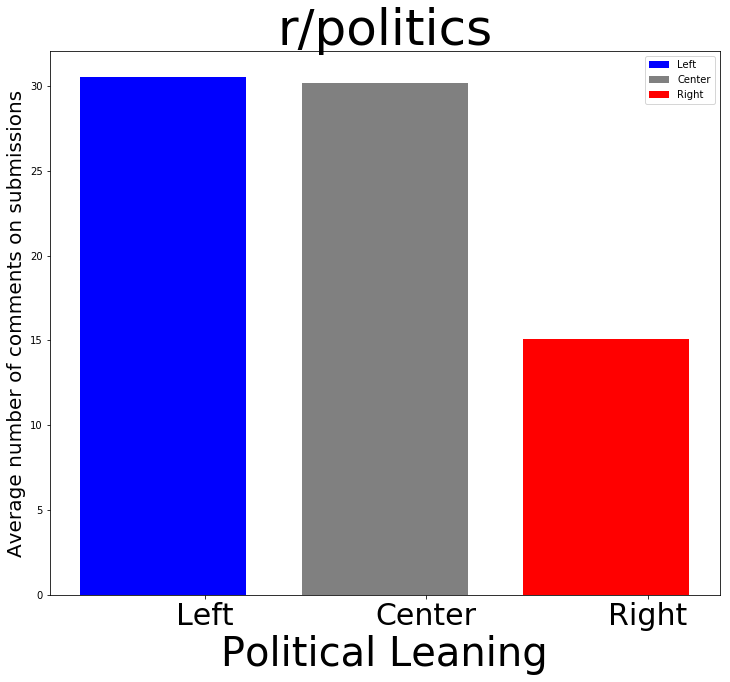

In [86]:
print("Average number of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average number of comments per post from right leaning outlets: ", str(len(comments_right)/len(posts_right)))
print("Average number of comments per post from left leaning outlets: ", str(len(comments_left)/len(posts_left)))
print("Average number of comments per post from center leaning outlets: ", str(len(comments_center)/len(posts_center)))
print("Average number of comments per post from social media: ", str(len(comments_social)/len(posts_social)))



plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [len(comments_left)/len(posts_left), len(comments_center)/len(posts_center), len(comments_right)/len(posts_right)]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average number of comments on submissions', fontsize=20)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/politics',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
ax.legend()

ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('politics/p3.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [24]:
average_right_comments_score = comments_right["score"].mean()
average_left_comments_score = comments_left["score"].mean()
average_center_comments_score = comments_center["score"].mean()
average_social_comments_score = comments_social["score"].mean()

Average score of comments for submissions

----------------------------------------------------


Average score of comments on posts from right leaning outlets:  5.291089750924972
Average score of comments on posts from left leaning outlets:  8.41555556449488
Average score of comments on posts from center leaning outlets:  8.304505362348861
Average score of comments on posts from social media:  4.397944778226468


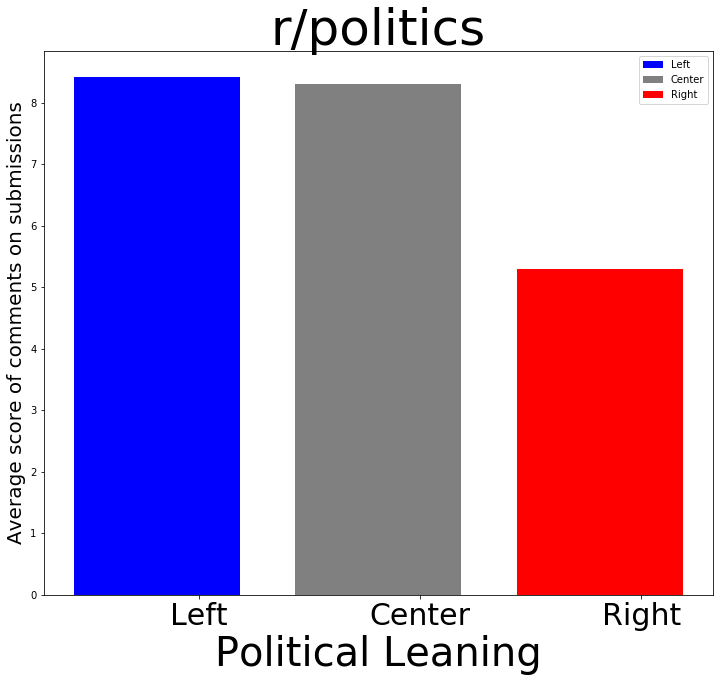

In [88]:
print("Average score of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average score of comments on posts from right leaning outlets: ", average_right_comments_score)
print("Average score of comments on posts from left leaning outlets: ", average_left_comments_score)
print("Average score of comments on posts from center leaning outlets: ", average_center_comments_score)
print("Average score of comments on posts from social media: ", average_social_comments_score)

plt.rcParams["figure.figsize"] = (12,10)
labels = ['Left', 'Center', 'Right']
num_subs = [average_left_comments_score, average_center_comments_score, average_right_comments_score]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'grey', 'r'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average score of comments on submissions', fontsize=20)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/politics',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  

ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('politics/p4.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [26]:
posts_right_by_date = posts_right.groupby("date").count()["id"].reset_index(name="counts")
posts_left_by_date = posts_left.groupby("date").count()["id"].reset_index(name="counts")
posts_center_by_date = posts_center.groupby("date").count()["id"].reset_index(name="counts")
posts_social_by_date = posts_social.groupby("date").count()["id"].reset_index(name="counts")

In [27]:
# submissions[["date", "id", "leaning"]].to_csv("subs_p.csv", index=False)
submissions[["date", "id", "leaning"]].groupby(["date", "leaning"]).count()["id"].reset_index(name="counts").to_csv("subs_p.csv", index=False)

C:\Users\mansi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


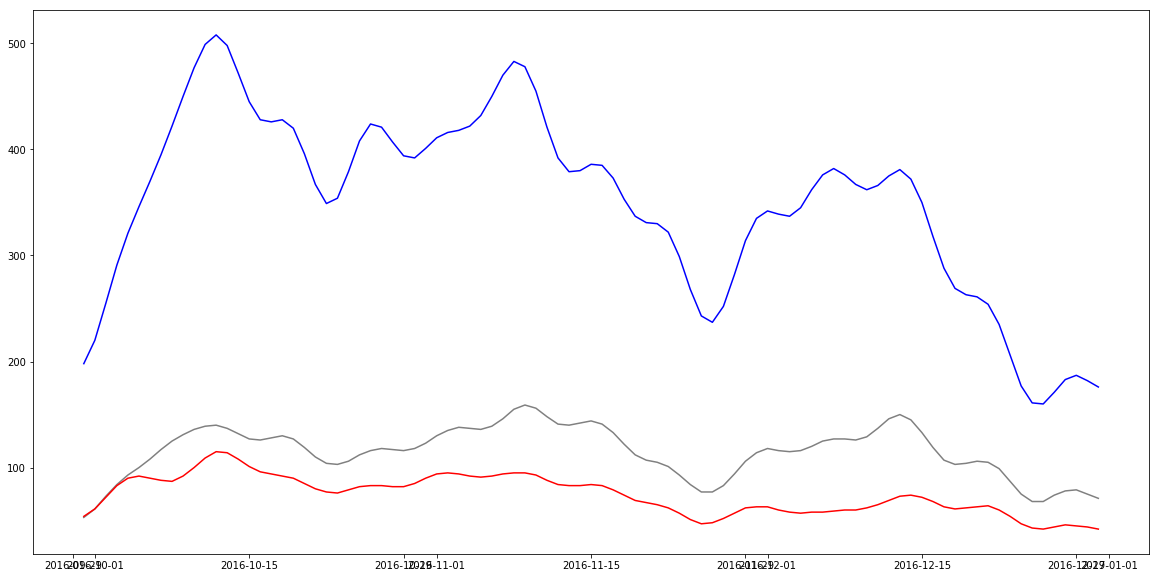

In [28]:
# posts_right_by_date.plot.line(x="date", y ="counts", subplots=True)

import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()

# plt.xlim(0,18000)
# plt.ylim(0,30)

labels= []

months = mdates.MonthLocator(range(10, 13), bymonthday=1, interval=15)
monthsFmt = mdates.DateFormatter("%d-%m-'%y")
ax.xaxis.set_major_locator(months) #adding this makes the month ints disapper
ax.xaxis.set_major_formatter(monthsFmt)
handles, labels = ax.get_legend_handles_labels() #legend is nowhere on the plot
ax.legend(handles, labels)

ax.set_ylabel('Average score of comments on submissions', fontsize=20)
ax.set_xlabel('Political Leaning',fontsize=40)
ax.set_title('r/politics',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend(['left', 'center', 'right'], loc="best")

plt.plot(posts_left_by_date['date'], gaussian_filter1d(posts_left_by_date['counts'], sigma=2), color='b')
plt.plot(posts_center_by_date['date'], gaussian_filter1d(posts_center_by_date['counts'], sigma=2), color='grey')
plt.plot(posts_right_by_date['date'], gaussian_filter1d(posts_right_by_date['counts'], sigma=2), color='r')




plt.show()

In [29]:
community = pd.read_csv("community.csv")
community.head()

,Subreddit 1,Subreddit 2,Common authors,Common authors as fraction of second subreddit,Common authors as fraction of first subreddit
0,SandersForPresident,SandersForPresident,2723,1.000000,1.000000
1,SandersForPresident,Conservative,206,0.015858,0.075652
2,SandersForPresident,democrats,78,0.023759,0.028645
3,SandersForPresident,Liberal,32,0.014713,0.011752
4,SandersForPresident,Republican,29,0.011048,0.010650


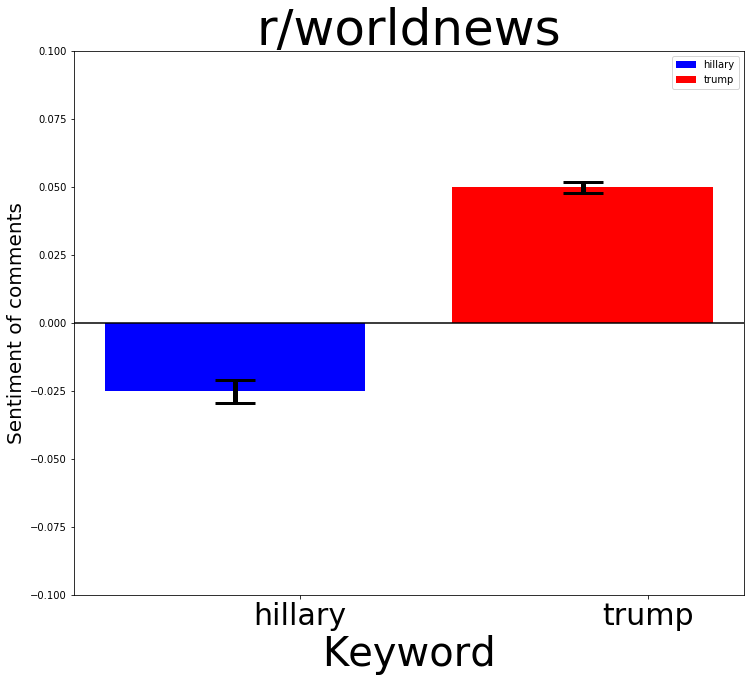

In [126]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['hillary', 'trump']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

# num_subs = [-0.137183490837847, -0.0720873581847649]

# x = range(7)

scores = [-0.0802258302583025,-0.0184233364089315]

errors = [0.00429316322784186, 0.00213251724345086]


x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
# ax.bar(x, num_subs[0], width=0.5, color='r', align='center')
# ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
error_kw_dict=dict(lw=5, capthick=3, ecolor='black', capsize=20)
b1 = ax.bar(x - width/4, num_subs, yerr=errors, width = width, color=['b', 'r'], align='center', error_kw=error_kw_dict)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment of comments', fontsize=20)
ax.set_xlabel('Keyword',fontsize=40)
ax.set_title('r/politics',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
plt.ylim((-0.1,0.1))
ax.axhline(color='black')
ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('sentiment/hdp.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

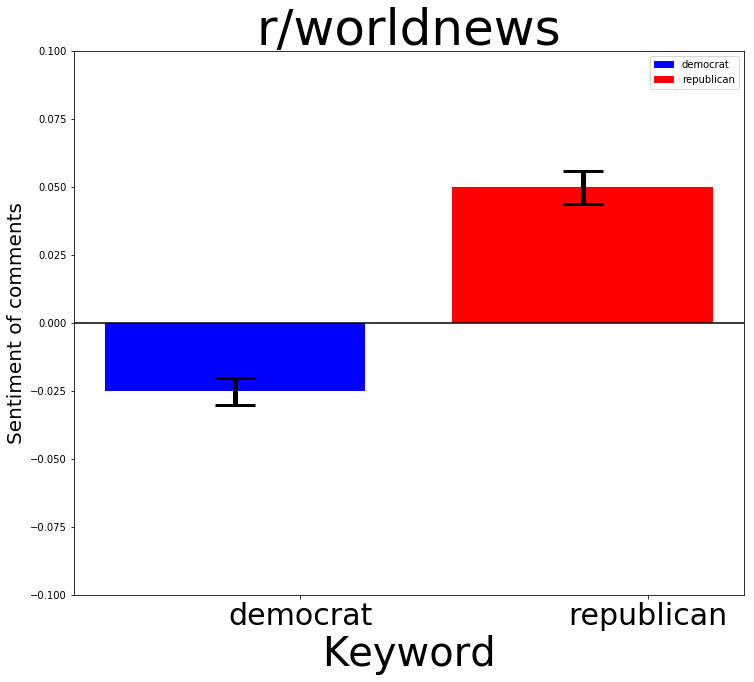

In [129]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['democrat', 'republican']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

# num_subs = [-0.137183490837847, -0.0720873581847649]

# x = range(7)

scores = [-0.0100925562483057,0.00619173951828724]

errors = [0.00490467343628673, 0.00617935049433048]


x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
# ax.bar(x, num_subs[0], width=0.5, color='r', align='center')
# ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
error_kw_dict=dict(lw=5, capthick=3, ecolor='black', capsize=20)
b1 = ax.bar(x - width/4, num_subs, yerr=errors, width = width, color=['b', 'r'], align='center', error_kw=error_kw_dict)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment of comments', fontsize=20)
ax.set_xlabel('Keyword',fontsize=40)
ax.set_title('r/worldnews',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
plt.ylim((-0.1,0.1))
ax.axhline(color='black')
ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('sentiment/drwn.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

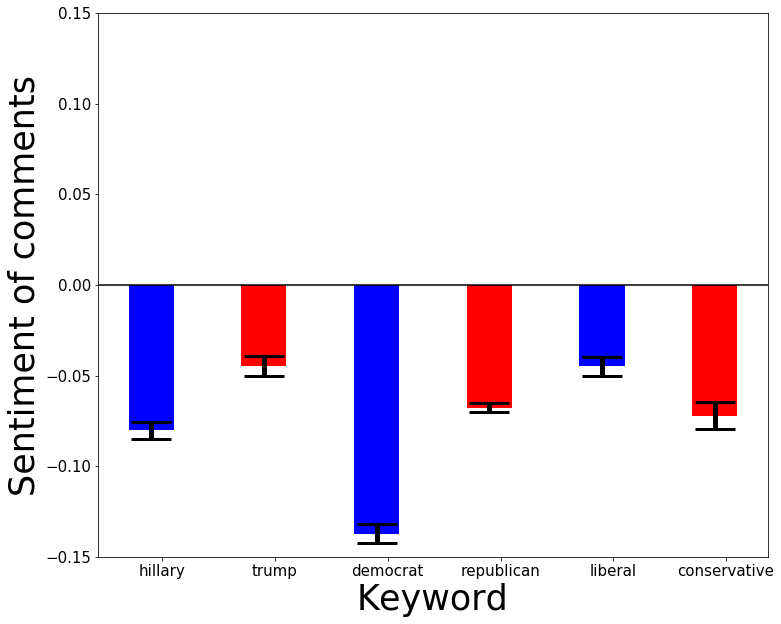

In [28]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['hillary', 'trump','democrat', 'republican','liberal', 'conservative']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

# num_subs = [-0.137183490837847, -0.0720873581847649]

# x = range(7)

# NEWS

scores = [-0.08022583026, -0.04471211147, -0.1371834908,-0.06767654722,-0.0449099677,-0.07208735818]
errors = [0.004551010501, 0.005528608006, 0.005277364662, 0.00240565934, 0.00526218258, 0.007443452507]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
# ax.bar(x, num_subs[0], width=0.5, color='r', align='center')
# ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
error_kw_dict=dict(lw=5, capthick=3, ecolor='black', capsize=20)
b1 = ax.bar(x - width/4, scores, yerr=errors, width = width, color=['b', 'r', 'b', 'r', 'b', 'r'], align='center', error_kw=error_kw_dict)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment of comments', fontsize=35)
ax.set_xlabel('Keyword',fontsize=35)
# ax.set_title('r/worldnews',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)  
plt.ylim((-0.15,0.15))
ax.axhline(color='black')
ax.tick_params(axis="y", labelsize=15)
# ax.legend(handles=["b", "r"], loc=1, labels=["left", "right"])
plt.savefig('sentiment/n_all.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

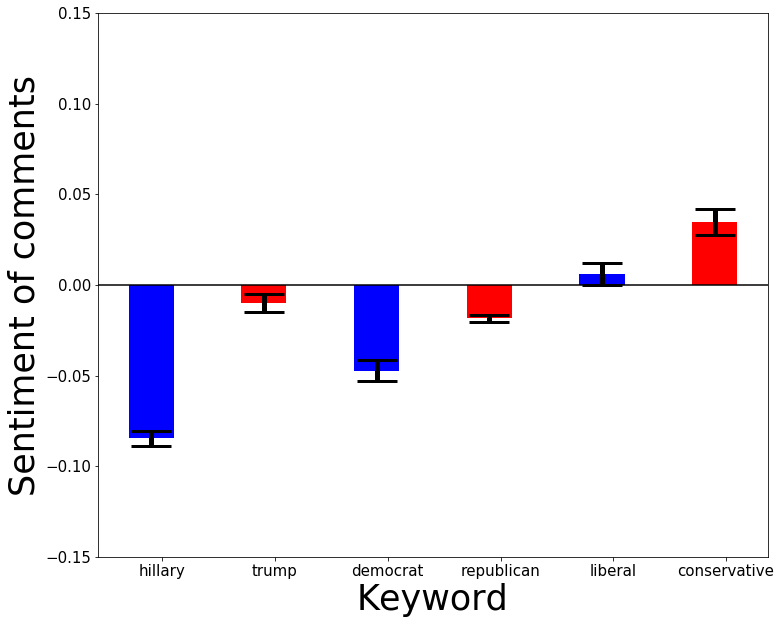

In [29]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['hillary', 'trump','democrat', 'republican','liberal', 'conservative']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

# num_subs = [-0.137183490837847, -0.0720873581847649]

# x = range(7)

# WORLD NEWS

scores = [-0.08462921509, -0.01009255625, -0.04722404153,-0.01842333641, 0.006191739518, 0.0345312989]
errors = [0.004293163228, 0.004904673436, 0.005605654256, 0.002132517243,0.006179350494,0.007193713275]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
# ax.bar(x, num_subs[0], width=0.5, color='r', align='center')
# ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
error_kw_dict=dict(lw=5, capthick=3, ecolor='black', capsize=20)
b1 = ax.bar(x - width/4, scores, yerr=errors, width = width, color=['b', 'r', 'b', 'r', 'b', 'r'], align='center', error_kw=error_kw_dict)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment of comments', fontsize=35)
ax.set_xlabel('Keyword',fontsize=35)
# ax.set_title('r/worldnews',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)  
plt.ylim((-0.15,0.15))
ax.axhline(color='black')
ax.tick_params(axis="y", labelsize=15)
# ax.legend(handles=["b", "r"], loc=1, labels=["left", "right"])
plt.savefig('sentiment/wn_all.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

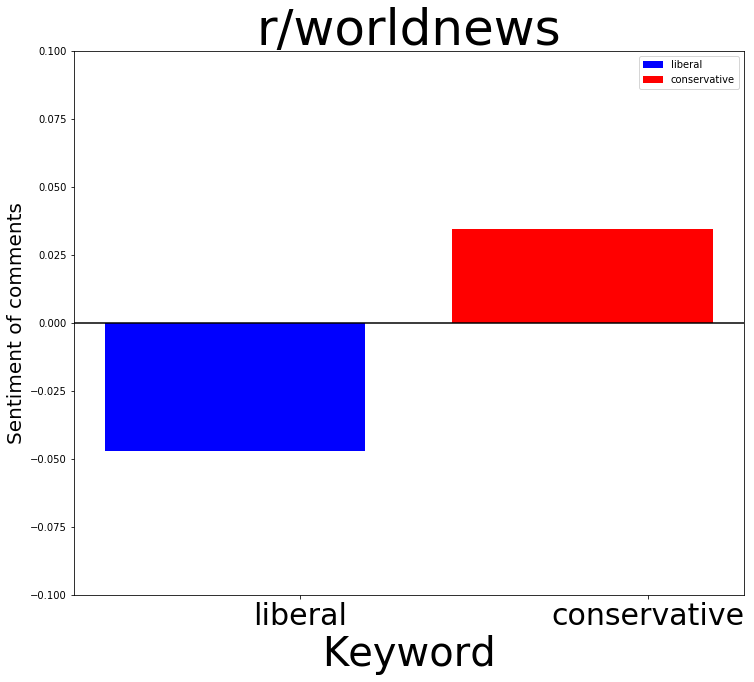

In [90]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['liberal', 'conservative']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

num_subs = [-0.0472240415276232, 0.0345312989045383]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
# ax.bar(x, num_subs[0], width=0.5, color='r', align='center')
# ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'r'], align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment of comments', fontsize=20)
ax.set_xlabel('Keyword',fontsize=40)
ax.set_title('r/worldnews',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
plt.ylim((-0.1,0.1))
ax.axhline(color='black')
ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('politics/p6.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

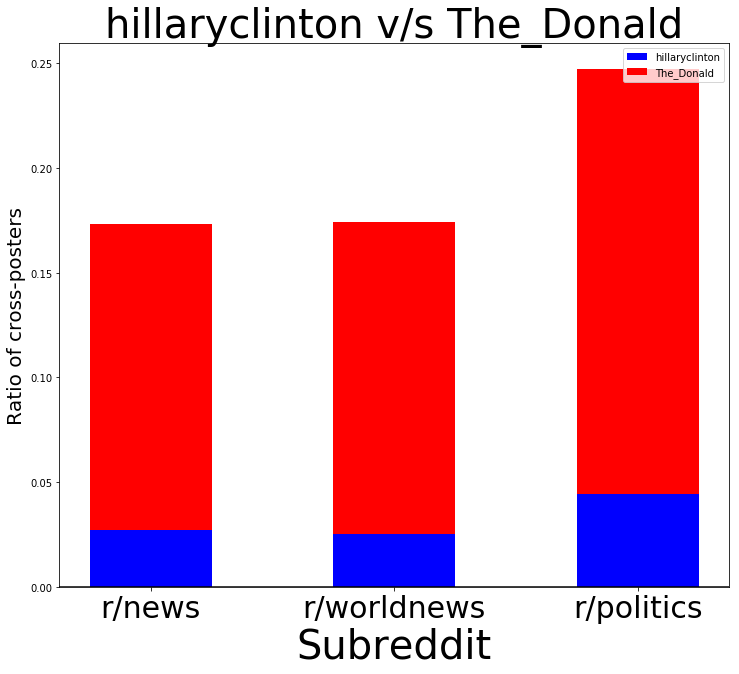

In [116]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['r/news', 'r/worldnews', 'r/politics']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

headers = ["hillaryclinton", "The_Donald"]
score_hillary = [0.0273221673167249, 0.0253361821553736, 0.044234731605057]
score_trump = [0.145858885422787, 0.149097755494912, 0.202988707095217]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
p1 = ax.bar(x, score_hillary, width=0.5, color='b', align='center')
p2 = ax.bar(x, score_trump, width=0.5, color='r', align='center', bottom=score_hillary)
# p3= ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
# b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'r'], align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio of cross-posters', fontsize=20)
ax.set_xlabel('Subreddit',fontsize=40)
ax.set_title('hillaryclinton v/s The_Donald',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
# plt.ylim((-0.1,0.1))
ax.axhline(color='black')

ax.legend((p1[0], p2[0]), (headers[0], headers[1]), loc=1)
plt.savefig('politics/p6.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

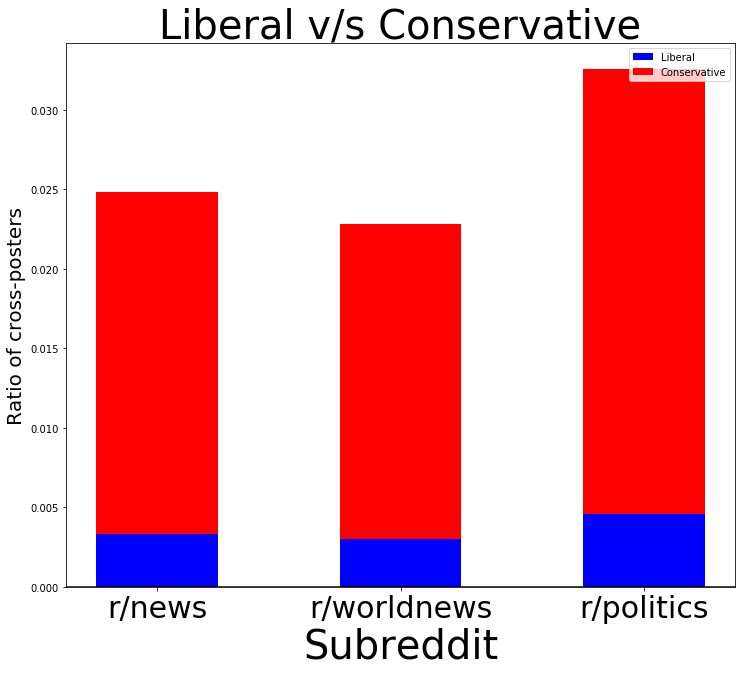

In [117]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['r/news', 'r/worldnews', 'r/politics']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

headers = ["Liberal", "Conservative"]
score_hillary = [0.00334822749017025, 0.00297574975495899, 0.00459469743199488]
score_trump = [0.021493333123001, 0.019835981186492, 0.0279666310099001]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
p1 = ax.bar(x, score_hillary, width=0.5, color='b', align='center')
p2 = ax.bar(x, score_trump, width=0.5, color='r', align='center', bottom=score_hillary)
# p3= ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
# b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'r'], align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio of cross-posters', fontsize=20)
ax.set_xlabel('Subreddit',fontsize=40)
ax.set_title('Liberal v/s Conservative',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
# plt.ylim((-0.1,0.1))
ax.axhline(color='black')

ax.legend((p1[0], p2[0]), (headers[0], headers[1]), loc=1)
plt.savefig('politics/p7.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

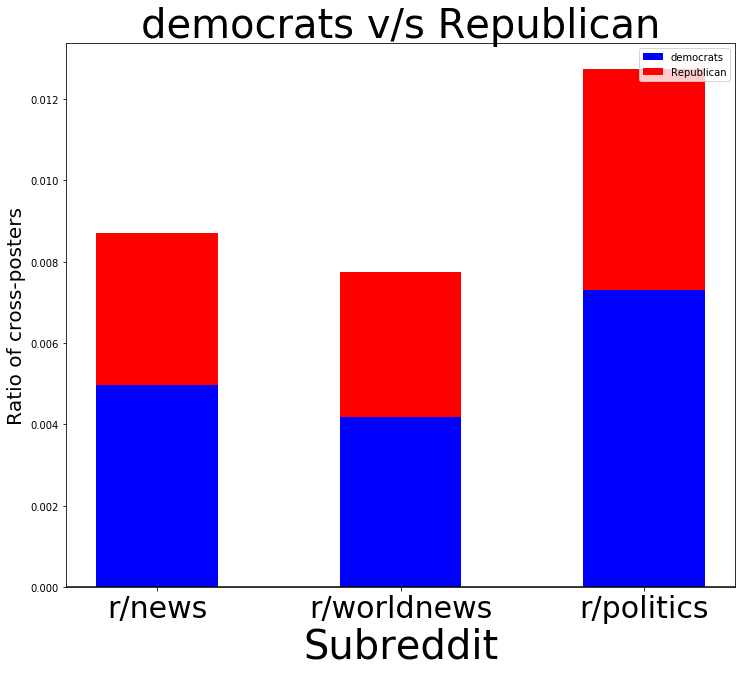

In [118]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['r/news', 'r/worldnews', 'r/politics']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

headers = ["democrats", "Republican"]
score_hillary = [0.00495726967625913, 0.00417803727443887, 0.00730126138802937]
score_trump = [0.00374654430584421, 0.00357513062977301, 0.00543466555628145]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
p1 = ax.bar(x, score_hillary, width=0.5, color='b', align='center')
p2 = ax.bar(x, score_trump, width=0.5, color='r', align='center', bottom=score_hillary)
# p3= ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
# b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'r'], align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ratio of cross-posters', fontsize=20)
ax.set_xlabel('Subreddit',fontsize=40)
ax.set_title('democrats v/s Republican',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
# plt.ylim((-0.1,0.1))
ax.axhline(color='black')

ax.legend((p1[0], p2[0]), (headers[0], headers[1]), loc=1)
plt.savefig('politics/p8.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

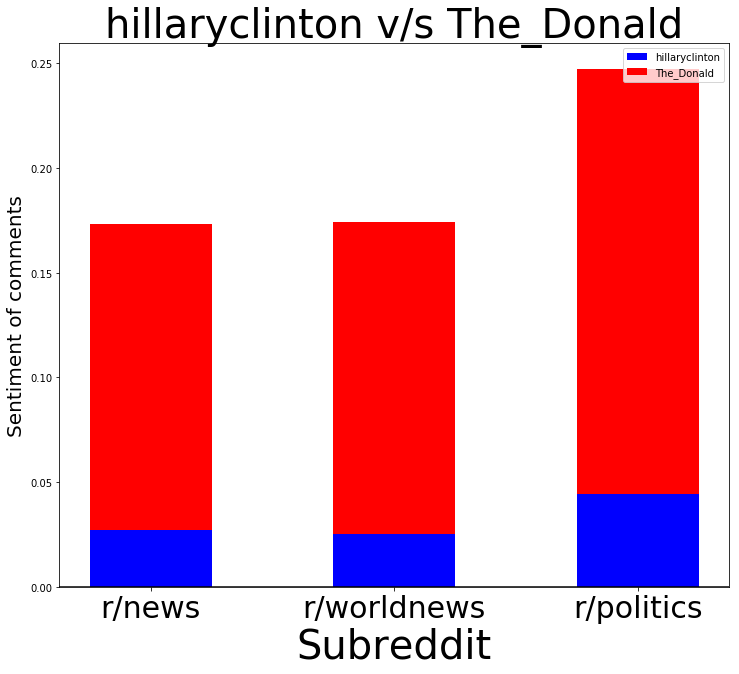

In [113]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['r/news', 'r/worldnews', 'r/politics']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

headers = ["hillaryclinton", "The_Donald"]
score_hillary = [0.0273221673167249, 0.0253361821553736, 0.044234731605057]
score_trump = [0.145858885422787, 0.149097755494912, 0.202988707095217]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
p1 = ax.bar(x, score_hillary, width=0.5, color='b', align='center')
p2 = ax.bar(x, score_trump, width=0.5, color='r', align='center', bottom=score_hillary)
# p3= ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
# b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'r'], align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment of comments', fontsize=20)
ax.set_xlabel('Subreddit',fontsize=40)
ax.set_title('hillaryclinton v/s The_Donald',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
# plt.ylim((-0.1,0.1))
ax.axhline(color='black')

ax.legend((p1[0], p2[0]), (headers[0], headers[1]), loc=1)
plt.savefig('politics/p6.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

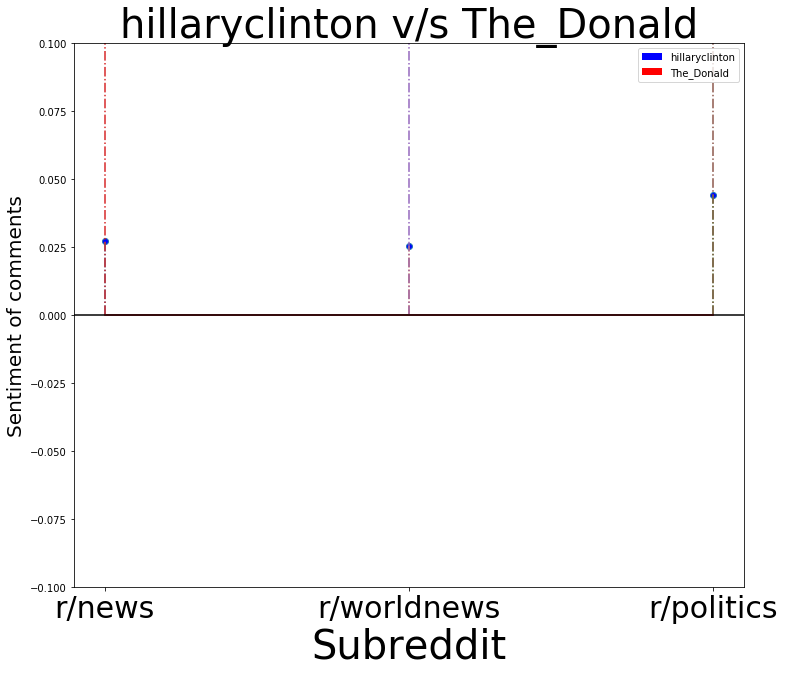

In [112]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['r/news', 'r/worldnews', 'r/politics']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

headers = ["hillaryclinton", "The_Donald"]
score_hillary = [0.0273221673167249, 0.0253361821553736, 0.044234731605057]
score_trump = [0.145858885422787, 0.149097755494912, 0.202988707095217]

x = np.arange(len(labels))



# s_n_hat = [1, -1, 1, 1, -1, 1, 1, 1, 1]
# x1 = list(range(0, 5))
# x2 = list(range(5, 8))

fig = plt.figure()
ax = plt.subplot()

markerline1, stemlines, _ = ax.stem(x, score_hillary, '-.')
plt.setp(markerline1, 'markerfacecolor', 'b')
markerline2, stemlines, _ = ax.stem(x, score_trump, '-.')
plt.setp(markerline2, 'markerfacecolor', 'r')
plt.ylim((-0.1,0.1))
# plt.show()




# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment of comments', fontsize=20)
ax.set_xlabel('Subreddit',fontsize=40)
ax.set_title('hillaryclinton v/s The_Donald',fontsize=40)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  

ax.axhline(color='black')

ax.legend((p1[0], p2[0]), (headers[0], headers[1]), loc=1)
plt.savefig('politics/p6.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)
labels = ['liberal', 'conservative']

# score_1=community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "hillaryclinton")]["Common authors as fraction of first subreddit"]
# score_2 =community[(community["Subreddit 1"].str== "news") & (community["Subreddit 2"].str == "The_Donald")]["Common authors as fraction of first subreddit"]

num_subs = [-0.137183490837847, -0.0720873581847649]

# x = range(7)



x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig = plt.figure()
ax = plt.subplot()
# ax.bar(x, num_subs[0], width=0.5, color='r', align='center')
# ax.bar(x, num_subs[1], width=0.5, color='b', align='center')
b1 = ax.bar(x - width/4, num_subs, width, color=['b', 'r'], align='center')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment of comments', fontsize=20)
ax.set_xlabel('Keyword',fontsize=40)
ax.set_title('r/news',fontsize=50)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=30)  
plt.ylim((-0.1,0.1))
ax.axhline(color='black')
ax.legend(handles=b1, loc=1, labels=labels)
plt.savefig('politics/p5.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

In [33]:
average_right_controversiality_score = comments_right["controversiality"].mean()
average_left_controversiality_score = comments_left["controversiality"].mean()
average_center_controversiality_score = comments_center["controversiality"].mean()
average_social_controversiality_score = comments_social["controversiality"].mean()

In [34]:
print("Average controversiality score of comments for submissions\n")
print("----------------------------------------------------\n\n")

print("Average controversiality score of comments on posts from right leaning outlets: ", average_right_controversiality_score)
print("Average controversiality score of comments on posts from left leaning outlets: ", average_left_controversiality_score)
print("Average controversiality score of comments on posts from center leaning outlets: ", average_center_controversiality_score)
print("Average controversiality score of comments on posts from social media: ", average_social_controversiality_score)

Average controversiality score of comments for submissions

----------------------------------------------------


Average controversiality score of comments on posts from right leaning outlets:  0.056060952816874544
Average controversiality score of comments on posts from left leaning outlets:  0.051043990192667026
Average controversiality score of comments on posts from center leaning outlets:  0.04966008056662514
Average controversiality score of comments on posts from social media:  0.0429101415016908


In [35]:
## Occurence of left leaning entities in title
right_keywords = ["donald", "trump", "republican", "gop"]
left_keywords = ["hillary", "clinton", "democrat", "dnc"]

total_score_right = 0
total_score_left = 0

count_right_in_right = posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_right =  posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_right.loc[posts_right["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

count_right_in_left = posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_left =  posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

count_right_in_center = posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_center = posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_center.loc[posts_center["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

count_right_in_social = posts_social.loc[posts_social["title"].apply(lambda x: any(s in x for s in right_keywords))].count()["id"]
total_score_right += posts_social.loc[posts_social["title"].apply(lambda x: any(s in x for s in right_keywords))]["score"].sum()
count_left_in_social = posts_social.loc[posts_social["title"].apply(lambda x: any(s in x for s in left_keywords))].count()["id"]
total_score_left += posts_left.loc[posts_left["title"].apply(lambda x: any(s in x for s in left_keywords))]["score"].sum()

total_length = len(all_included_posts)
average_score_right = total_score_right / total_length
average_score_left = total_score_left / total_length

In [36]:
print("Right leaning words: ", right_keywords)
print("Number of mentions of right leaning words in right leaning posts: ", count_right_in_right)
print("Number of mentions of right leaning words in left leaning posts: ", count_right_in_left)
print("Number of mentions of right leaning words in center leaning posts: ", count_right_in_center)
print("Number of mentions of right leaning words in social media posts: ", count_right_in_social)
print("\n")
print("Average score of posts with right leaning words: ", average_score_right)




print("\n\n---------------------------------------------------------------------------------------------------\n\n")

print("Left leaning words: ", left_keywords)
print("Number of mentions of left leaning words in right leaning posts: ", count_left_in_right)
print("Number of mentions of left leaning words in left leaning posts: ", count_left_in_left)
print("Number of mentions of left leaning words in center leaning posts: ", count_left_in_center)
print("Number of mentions of left leaning words in social media posts: ", count_left_in_social)
print("\n")
print("Average score of posts with left leaning words: ", average_score_left)

Right leaning words:  ['donald', 'trump', 'republican', 'gop']
Number of mentions of right leaning words in right leaning posts:  13
Number of mentions of right leaning words in left leaning posts:  60
Number of mentions of right leaning words in center leaning posts:  20
Number of mentions of right leaning words in social media posts:  212


Average score of posts with right leaning words:  0.08085473709716501


---------------------------------------------------------------------------------------------------


Left leaning words:  ['hillary', 'clinton', 'democrat', 'dnc']
Number of mentions of left leaning words in right leaning posts:  15
Number of mentions of left leaning words in left leaning posts:  37
Number of mentions of left leaning words in center leaning posts:  4
Number of mentions of left leaning words in social media posts:  90


Average score of posts with left leaning words:  0.02089895808093046


In [37]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from math import sqrt

In [38]:
submissions.columns

Index(['archived', 'author', 'author_flair_css_class', 'author_flair_text',
       'contest_mode', 'created_utc', 'distinguished', 'domain', 'downs',
       'edited', 'gilded', 'hide_score', 'id', 'is_self',
       'link_flair_css_class', 'link_flair_text', 'locked', 'media',
       'media_embed', 'name', 'num_comments', 'over_18', 'permalink',
       'post_hint', 'preview', 'quarantine', 'retrieved_on', 'saved', 'score',
       'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'thumbnail', 'title', 'ups', 'url',
       'leaning', 'base_domain', 'full_date', 'date'],
      dtype='object')

In [39]:
domain_post_frequency[domain_post_frequency["base_domain"]=="foxnews"]["count"]

domain_post_frequency_dict = domain_post_frequency.set_index('base_domain').T.to_dict()
domain_post_frequency_dict.get("youtube").get("count")

9761

In [40]:
def get_count(domain):
    if domain in domain_post_frequency_dict.keys():
        return domain_post_frequency_dict.get(domain).get("count")
    else:
        return 0
    

In [41]:
submissions["full_date"] =  submissions["created_utc"].apply(lambda x: datetime.fromtimestamp(x))
submissions["date"] = submissions["full_date"].dt.date
# submissions["time"] = submissions["full_date"].str.split(" ")[1]
# submissions["year"] =  pd.DatetimeIndex(submissions["date"]).year
# submissions["month"] =  pd.DatetimeIndex(submissions["date"]).month
# submissions["day"] =  pd.DatetimeIndex(submissions["date"]).day
# submissions["week"] =  pd.DatetimeIndex(submissions["date"]).week

submissions["hour"] =  pd.DatetimeIndex(submissions["full_date"]).hour
submissions["title"] =  submissions["title"].apply(lambda x: x.lower())

submissions["history"] = submissions["base_domain"].apply(lambda x: get_count(x))
# submissions["min"] =  pd.DatetimeIndex(submissions["time"]).minute

# submissions[["hour"]]

In [42]:
submissions.columns

Index(['archived', 'author', 'author_flair_css_class', 'author_flair_text',
       'contest_mode', 'created_utc', 'distinguished', 'domain', 'downs',
       'edited', 'gilded', 'hide_score', 'id', 'is_self',
       'link_flair_css_class', 'link_flair_text', 'locked', 'media',
       'media_embed', 'name', 'num_comments', 'over_18', 'permalink',
       'post_hint', 'preview', 'quarantine', 'retrieved_on', 'saved', 'score',
       'secure_media', 'secure_media_embed', 'selftext', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'thumbnail', 'title', 'ups', 'url',
       'leaning', 'base_domain', 'full_date', 'date', 'hour', 'history'],
      dtype='object')

In [43]:
submissions["history"].head()

0    6648
1    6648
2    5413
3       0
4       0
Name: history, dtype: int64

In [44]:
embeddings = {}

with open('glove.6B.50d.txt',encoding="utf8") as f:
    lines = f.read().strip().split('\n')
    for line in lines:
        word = line.split()[0]
        vector = np.array(line.split()[1:], dtype=np.float)
        embeddings[word] = vector

In [45]:
def get_embeddings(title):
    pattern = re.compile('[\W_]+')
    s = "this is a sample sentence?"
    tokens = pattern.sub(' ', title).lower().split()
    title_embed = np.array([embeddings[word] for word in tokens if word in embeddings])
    avg_title_embed = np.mean(title_embed, axis=0)
#     print("Returning: ", avg_title_embed)
    return avg_title_embed

In [46]:
def get_time_of_day(hour):
    if hour >=0 and hour<=6:
        return "night"
    elif hour>6  and hour<=12:
        return "morning"
    elif hour>12 and hour<=18:
        return "noon"
    elif hour>18 and hour<=24:
        return "evening"

In [47]:
submissions["tod"] = submissions["hour"].apply(lambda x: get_time_of_day(x))

In [48]:
plt.rcParams["figure.figsize"] = (20,10)

xx = submissions[["num_comments", "title", "hour", "leaning", "score", "history", "tod"]]

leaning_dummies = pd.get_dummies(xx["leaning"], prefix="is")
xx= pd.concat([xx, leaning_dummies], axis=1)
xx.drop("leaning", axis=1, inplace=True)


tod_dummies = pd.get_dummies(xx["tod"], prefix="is")
xx= pd.concat([xx, tod_dummies], axis=1)
xx.drop("tod", axis=1, inplace=True)

# print(len(X))

# print(xx.corr(method="pearson"))
# plt.matshow(xx.corr(method="pearson"))
# plt.show()
print(xx.corr())

corrs = xx.corr()


# corrs.to_csv("corrs.csv",index=False)


              num_comments      hour     score   history  is_center   is_left  \
num_comments      1.000000 -0.016499  0.675154 -0.017100   0.011466  0.023151   
hour             -0.016499  1.000000 -0.029823 -0.003758  -0.003999 -0.020474   
score             0.675154 -0.029823  1.000000 -0.016308   0.019241  0.036655   
history          -0.017100 -0.003758 -0.016308  1.000000  -0.000298  0.339842   
is_center         0.011466 -0.003999  0.019241 -0.000298   1.000000 -0.179790   
is_left           0.023151 -0.020474  0.036655  0.339842  -0.179790  1.000000   
is_other          0.007254 -0.000851  0.002479 -0.631500  -0.290806 -0.563093   
is_right         -0.011974  0.011956 -0.025081 -0.095781  -0.073554 -0.142425   
is_social        -0.042988  0.023499 -0.051159  0.570097  -0.115219 -0.223101   
is_evening       -0.010788  0.669439 -0.024859  0.007069  -0.014514 -0.022552   
is_morning       -0.008166 -0.315303  0.002448 -0.006019   0.000210  0.010320   
is_night          0.023180 -

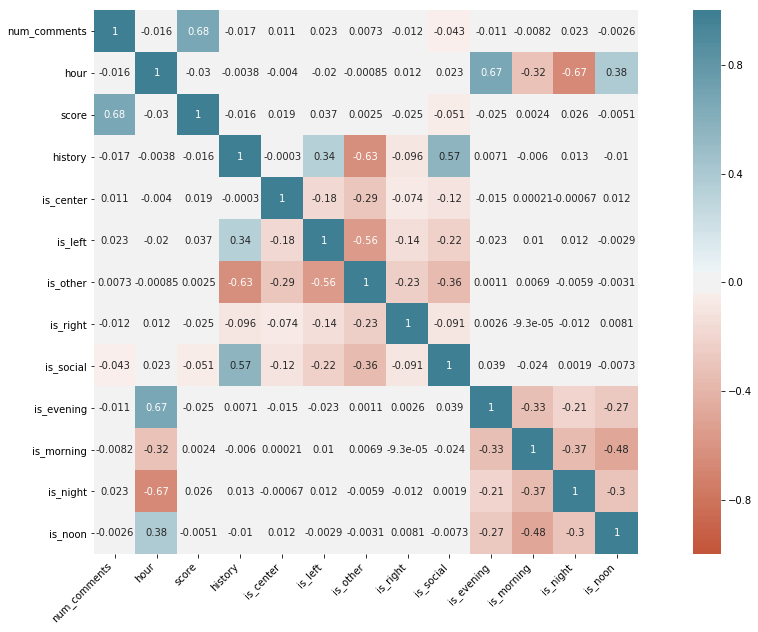

In [49]:
import seaborn as sns
corr = xx.corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

[[1.         0.48762665 0.92942604 0.48717594 0.50859931 0.51736046
  0.50544038 0.49101989 0.46777873 0.49190895 0.49387577 0.51738189
  0.49807702]
 [0.48762665 1.         0.47763913 0.49718124 0.4970007  0.48464631
  0.49936183 0.50896642 0.51762078 0.92707714 0.271359   0.0708849
  0.76971394]
 [0.92942604 0.47763913 1.         0.48777042 0.51442862 0.52747868
  0.50185907 0.48119355 0.46166439 0.48135927 0.5018358  0.51966565
  0.49614556]
 [0.48717594 0.49718124 0.48777042 1.         0.49977617 0.74506926
  0.08933423 0.4283836  0.88125088 0.5053015  0.49548596 0.50949851
  0.4923138 ]
 [0.50859931 0.4970007  0.51442862 0.49977617 1.         0.36661008
  0.28804395 0.44493378 0.41396803 0.48911554 0.50015733 0.49949849
  0.50909256]
 [0.51736046 0.48464631 0.52747868 0.74506926 0.36661008 1.
  0.12231589 0.39390382 0.33545033 0.48308922 0.50773945 0.50878583
  0.49784012]
 [0.50544038 0.49936183 0.50185907 0.08933423 0.28804395 0.12231589
  1.         0.33028071 0.24110319 0.5007

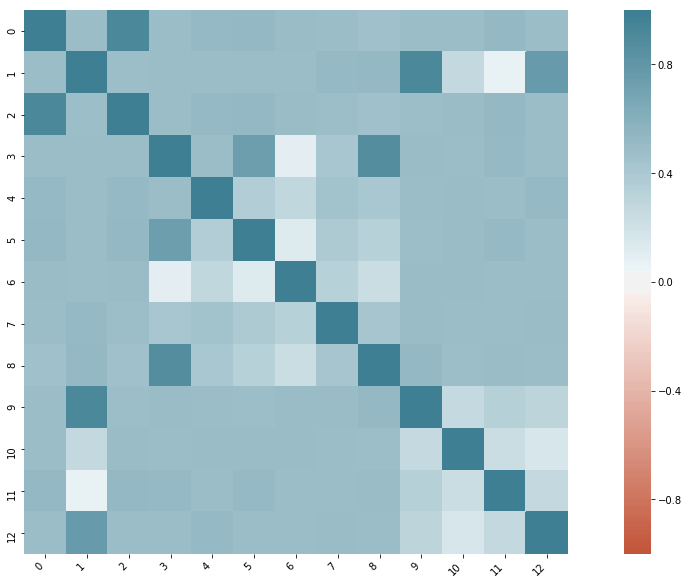

In [50]:
n=6
r=xx.corr()
t=r*np.sqrt((n-2)/(1-r*r))

import scipy.stats as ss
pvalues = ss.t.cdf(t, n-2)
print(pvalues)

corr = xx.corr(method='pearson')
ax = sns.heatmap(
    pvalues, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [51]:
random_seed = 2

In [52]:
X = submissions[["title", "hour", "leaning", "score"]]
# print(len(X))
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)
# print(len(X))

leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
X = pd.concat([X, leaning_dummies], axis=1)
X.drop("leaning", axis=1, inplace=True)
# print(len(X))

# print(X.corr())

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
# print(len(X))
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)
# print(len(X))  

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1, inplace=True)
# print(len(X))

# print("Columns: ", X.columns)
# print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

score_rmse = sqrt(mean_squared_error(y_test, y_pred))
score_r2 = r2_score(y_test, y_pred)
print("Root Mean squared error: %.2f"
      % score_rmse)
print('Variance(R2) score: %.2f' % score_r2)   

C:\Users\mansi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Root Mean squared error: 1189.33
Variance(R2) score: 0.01


In [53]:
X = submissions[["title", "hour",  "score"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

# leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
# X = pd.concat([X, leaning_dummies], axis=1)
# X = X.drop("leaning", axis=1)

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

C:\Users\mansi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Root Mean squared error: 1190.91
Variance(R2) score: 0.01


In [54]:
X = submissions[["num_comments", "title", "hour",  "score"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

C:\Users\mansi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Root Mean squared error: 897.89
Variance(R2) score: 0.43


In [55]:
X = submissions[["num_comments", "title", "hour", "score", "leaning"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
X = pd.concat([X, leaning_dummies], axis=1)
X = X.drop("leaning", axis=1)

X['vector'] = X['title'].apply(get_embeddings)
# X = pd.concat([X, ])
X.drop("title", axis=1, inplace=True)
s = X["vector"].apply(pd.Series)
X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

C:\Users\mansi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Root Mean squared error: 897.43
Variance(R2) score: 0.44


In [56]:
X = submissions[["num_comments", "hour",  "score"]]
hours_dummies = pd.get_dummies(X["hour"], prefix="hour")
X = pd.concat([X, hours_dummies], axis=1)
X.drop("hour", axis=1, inplace=True)

# leaning_dummies = pd.get_dummies(X["leaning"], prefix="is")
# X = pd.concat([X, leaning_dummies], axis=1)
# X = X.drop("leaning", axis=1)

# X['vector'] = X['title'].apply(get_embeddings)
# # X = pd.concat([X, ])
# X.drop("title", axis=1, inplace=True)
# s = X["vector"].apply(pd.Series)
# X = pd.concat([X,s], axis=1)
X.drop("vector", axis=1, inplace=True)

X.dropna(axis=0, inplace=True)
y = X["score"]
X.drop("score", axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = random_seed)

lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)


score_no_lean_mse = sqrt(mean_squared_error(y_test, y_pred))
score_no_lean_r2 = r2_score(y_test, y_pred)

print("Root Mean squared error: %.2f"
      % score_no_lean_mse)

print('Variance(R2) score: %.2f' % score_no_lean_r2)

KeyError: "['vector'] not found in axis"

In [ ]:
model.coef_

In [ ]:
import matplotlib.pyplot as plt

